In [194]:
## Définition des fonctons 

import os
import re
import time
import json


from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.firefox import options as firefox_options


def get_driver(headless=False):
    """Returns a selenium firefox webdriver
    Args:
        headless (bool, optional): Whether to hide the browser. Defaults to False.
    Returns:
        selenium.webdriver.Firefox: firefox webdriver
    """
    if headless:
        options = firefox_options.Options()
        options.add_argument("--headless")
        driver = webdriver.Firefox(options=options)
    else:
        driver = webdriver.Firefox()
    return driver

def get_page(count=10,headless=False):
  driver = get_driver(headless=headless)

  pages = []

  for page_number in range(1, count+1):
    #page_url = f"https://www.logic-immo.com/vente-immobilier/options/grouplocalities=1_0,21_0,12_0,8_0,84_1,11_0,13_0/groupprptypesids=1,2/page={page_number}"
    page_url = f"https://www.seloger.com/list.htm?projects=2%2C5&types=2%2C1&natures=1%2C2%2C4&places=%5B%7B%22divisions%22%3A%5B2238%5D%7D%5D&enterprise=0&qsVersion=1.0&LISTING-LISTpg={page_number}"
    #page_url = f"https://www.leboncoin.fr/_immobilier_/offres/p-{page_number}"
    driver.get(page_url)
    time.sleep(13)
    pages.append(driver.page_source.encode("utf-8"))
  return pages

def save_pages(pages):
  os.makedirs("data", exist_ok=True)
  for page_nb, page in enumerate(pages):
    with open(f"data/page_{page_nb}.html", "wb") as f_out: 
      f_out.write(page)

def parse_pages():
  pages_paths = os.listdir("data")

  results = pd.DataFrame()
  results = pd.DataFrame()
  pages_paths = os.listdir("data")
  for pages_path in pages_paths:
      with open(os.path.join("data", pages_path), "rb") as f_in:
          page = f_in.read().decode("utf-8")
          results = results.append(parse_page(page))
  return results

def parse_page(page):

  soup = BeautifulSoup(page,"html.parser")
  result = pd.DataFrame()

  result["price (€)"] = [
     clean_price(tag) for tag in soup.find_all(attrs={"class": "Price__PriceWrapper-sc-1g9fitq-1 cHTIJq"})
  ]

  result["type"] = [
      clean_type(tag) for tag in soup.find_all(attrs={"class": "ContentZone__Title-wghbmy-4 clOuRb"})
  ]

  result["adresse"] = [
      clean_postal_code(tag) for tag in soup.find_all(attrs={"class": "ContentZone__Address-wghbmy-0 bZvSwz"})
  ]

  areas = soup.find_all(attrs={"class": "ContentZone__TagsLine-wghbmy-6 cNYziv"})
  result["description"] = [tag.text.strip() for tag in areas]
     

  # areas = soup.find_all(attrs={"class": "announceDtlPrice"})
  # areas = soup.find_all(attrs={"class": "Price__PriceContainer-sc-1g9fitq-0 knHjrC"})
  # #areas = soup.find_all(attrs={"class": "sc-fHxwqH hAXnvi"})
  # result["price"] = [tag.text.strip() for tag in areas]
  return result

def clean_price(tag):
    text = tag.text.strip()
    price = int(text.replace("€", "").replace(" ", ""))
    return price

def clean_type(tag):
    text = tag.text.strip()
    return text.replace("Location ", "")


def clean_surface(tag):
    text = tag.text.strip()
    return int(text.replace("m²", ""))


def clean_rooms(tag):
    text = tag.text.strip()
    rooms = int(text.replace("p.", "").replace(" ", "")) 
    return rooms


def clean_postal_code(tag):
    text = tag.text.strip()
    match = re.match(".*\(([0-9]+)\).*", text)
    return match.groups()[0]


def main():
  #pages = get_page()
  #save_pages(pages)
  results = parse_pages()
  return results
main()
url = "https://www.logic-immo.com/vente-immobilier/options/grouplocalities=1_0,21_0,12_0,8_0,84_1,11_0,13_0/groupprptypesids=1,2/page=1"

/var/folders/kx/18yvj8nj4vv8ldfpywcpr1w40000gn/T/ipykernel_42155/351735874.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(parse_page(page))
/var/folders/kx/18yvj8nj4vv8ldfpywcpr1w40000gn/T/ipykernel_42155/351735874.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(parse_page(page))
/var/folders/kx/18yvj8nj4vv8ldfpywcpr1w40000gn/T/ipykernel_42155/351735874.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(parse_page(page))
/var/folders/kx/18yvj8nj4vv8ldfpywcpr1w40000gn/T/ipykernel_42155/351735874.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

In [195]:
#On récupére les données et affichage des données 
results = main()
print(results)

/var/folders/kx/18yvj8nj4vv8ldfpywcpr1w40000gn/T/ipykernel_42155/351735874.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(parse_page(page))
/var/folders/kx/18yvj8nj4vv8ldfpywcpr1w40000gn/T/ipykernel_42155/351735874.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(parse_page(page))
/var/folders/kx/18yvj8nj4vv8ldfpywcpr1w40000gn/T/ipykernel_42155/351735874.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(parse_page(page))
/var/folders/kx/18yvj8nj4vv8ldfpywcpr1w40000gn/T/ipykernel_42155/351735874.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

    price (€)         type adresse  \
0      417000  Appartement   92130   
1      359000  Appartement   93260   
2      246000  Appartement   93300   
3      654050  Appartement   92100   
4      595000  Appartement   75012   
..        ...          ...     ...   
20    1150000  Appartement   75003   
21     423000  Appartement   93500   
22     595000       Maison   78300   
23    2362000  Appartement   75016   
24     180000  Appartement   91700   

                                          description  
0           3 pièces2 chambres55 m²Étage 5/7Ascenseur  
1      2 pièces1 chambre42 m²Étage 7/8BalconAscenseur  
2   2 pièces1 chambre43 m²Étage 1/5JardinParkingAs...  
3   4 pièces3 chambres79 m²Étage 2/6ParkingAscense...  
4   3 pièces2 chambres63 m²Étage 2/6BalconParkingA...  
..                                                ...  
20          3 pièces2 chambres85 m²Étage 1/6Ascenseur  
21           3 pièces1 chambre65 m²Étage 5/53 balcons  
22              6 pièces4 chambres98 m²

/var/folders/kx/18yvj8nj4vv8ldfpywcpr1w40000gn/T/ipykernel_42155/351735874.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(parse_page(page))
/var/folders/kx/18yvj8nj4vv8ldfpywcpr1w40000gn/T/ipykernel_42155/351735874.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(parse_page(page))


In [196]:
#On affiche les données à séparer 
results['description']

0             3 pièces2 chambres55 m²Étage 5/7Ascenseur
1        2 pièces1 chambre42 m²Étage 7/8BalconAscenseur
2     2 pièces1 chambre43 m²Étage 1/5JardinParkingAs...
3     4 pièces3 chambres79 m²Étage 2/6ParkingAscense...
4     3 pièces2 chambres63 m²Étage 2/6BalconParkingA...
                            ...                        
20            3 pièces2 chambres85 m²Étage 1/6Ascenseur
21             3 pièces1 chambre65 m²Étage 5/53 balcons
22                6 pièces4 chambres98 m²Terrain 150 m²
23    5 pièces4 chambres197 m²Étage 0/7ParkingAscenseur
24    2 pièces1 chambre44 m²Étage 0/5TerrasseJardinP...
Name: description, Length: 250, dtype: object

In [197]:
def extract_info(description):
    # Initialiser les variables
    nb_pieces = ""
    nb_chambres = ""
    etage = ""
    ascenseur = ""
    parking = ""
    jardin = ""
    terrasse = ""
    surface = ""
    
    # Extraire les informations de la colonne "description" à l'aide des expressions régulières
    matches = re.findall(r'(\d+)\s*pièces|(\d+)\s*chambre*|(\d+)\s*m²|Étage\s*(\d+)/|(Ascenseur)|(Parking)|(Jardin)|(Terrasse)', description)
    # Affecter les valeurs extraites aux variables correspondantes
    for match in matches:
        if match[0]:
            nb_pieces = match[0]
        elif match[1]:
            nb_chambres = match[1]
        elif match[2]:
            surface = match[2]     
        elif match[3]:
            etage = match[3]
    
    for match in matches:
      if match[4]:
        ascenseur = "True"
      else: 
        ascenseur = "false"
    
    for match in matches:
      if match[5]:
        parking = "True"
      else: 
        parking = "false"
    for match in matches:
      if match[6]:
        jardin = "True"
      else: 
        jardin =  "false"
    for match in matches:
      if match[7]:
        terrasse = "True"
      else: 
        terrasse = "false"
    
    # Retourner les valeurs extraites sous forme d'un dictionnaire
    return {"nb_pieces": nb_pieces, "nb_chambres": nb_chambres, "surface" : surface , "etage": etage, "ascenseur": ascenseur, "parking": parking, "jardin": jardin, "terrasse": terrasse}

In [198]:
# Appliquer la fonction extract_info à la colonne "description" pour créer les nouvelles colonnes
results=pd.concat([results,dsc.apply(lambda x: pd.Series(extract_info(x)))], axis=1)

# Supprimer la colonne "description" originale
results.drop("description", axis=1, inplace=True)

# On renomme la colonne "adresse" par "code_postal"
results = results.rename(columns={ 'adresse': 'code_postal' })

In [160]:
## Affichage du DataFrame aprés nettoyage de données 
results

,price (€),type,code_postal,nb_pieces,nb_chambres,surface,etage,ascenseur,parking,jardin,terrasse
0,417000,Appartement,92130,3,2,55,5,True,false,false,false
1,359000,Appartement,93260,2,1,42,7,True,false,false,false
2,246000,Appartement,93300,2,1,43,1,True,false,false,false
3,654050,Appartement,92100,4,3,79,2,True,false,false,false
4,595000,Appartement,75012,3,2,63,2,True,false,false,false
...,...,...,...,...,...,...,...,...,...,...,...
20,1150000,Appartement,75003,3,2,85,1,True,false,false,false
21,423000,Appartement,93500,3,1,65,5,false,false,false,false
22,595000,Maison,78300,6,4,150,,false,false,false,false
23,2362000,Appartement,75016,5,4,197,0,True,false,false,false


In [287]:
## On voit qu'il y a différent type de "Maison"
print(results.type.value_counts())

Appartement                  176
Maison                        20
Maison 1 étage                17
Studio                        16
Maison 2 étages                6
Duplex                         4
Maison 3 étages                2
Duplex meublé                  1
Maison contemporaine           1
Maison de ville                1
Propriété 1 étage              1
Maison de ville 1 étage        1
Maison en pierre 2 étages      1
Appartement neuf               1
Domaine 1 étage                1
Maison de village              1
Name: type, dtype: int64


In [288]:
## On regroupe tous les types de maison ensemble
dfb = results["type"]
type_de_bien = ["Maison 1 étage","Maison 2 étages","Maison 3 étages","Maison de ville 1 étage","Maison de ville","Maison de village","Maison en pierre 2 étages","Maison contemporaine"]
for x in type_de_bien:
    dfb = dfb.replace(x,"Maison")
dfb.value_counts()

Appartement          176
Maison                50
Studio                16
Duplex                 4
Duplex meublé          1
Propriété 1 étage      1
Appartement neuf       1
Domaine 1 étage        1
Name: type, dtype: int64

In [347]:
## On regroupe tous les types de Duplex ensemble
type_de_bien = ["Duplex meublé"]
for x in type_de_bien:
    dfb = dfb.replace(x,"Duplex")
dfb.value_counts()

Appartement          177
Maison                50
Studio                16
Duplex                 5
Propriété 1 étage      1
Domaine 1 étage        1
Name: type, dtype: int64

In [348]:
## On regroupe tous les types d'appart ensemble
type_de_bien = ["Appartement neuf"]
for x in type_de_bien:
    dfb = dfb.replace(x,"Appartement")
dfb.value_counts()

Appartement          177
Maison                50
Studio                16
Duplex                 5
Propriété 1 étage      1
Domaine 1 étage        1
Name: type, dtype: int64

In [349]:
## Modification du type de "surface" afin de pouvoir exploiter la données
m2 = results["surface"].astype(str).astype(int)
## Ajout d'une colonne du prix au m2 arrondie au dixiéme
df_clean = results.assign(price_m2 = round(results["price (€)"]/m2,2))
## Mise à jour des valeurs "type"
df_clean["type"] = dfb

In [350]:
# Cette méthode crée la sortie d’une statistique complète de l’ensemble de données numériques.
#print(results.describe())
df_clean.describe()

,price (€),price_m2
count,2.500000e+02,250.0000
mean,5.316899e+05,inf
std,3.129114e+05,NaN
min,1.150000e+05,517.4200
25%,3.200000e+05,4757.9400
50%,4.625000e+05,7236.5050
75%,6.460000e+05,9375.9275
max,2.495000e+06,inf


In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Information sur le dataframe
results.info 

# Affichage des premieres donnees 

nb_annonce = results[['price (€)','code_postal']].groupby('code_postal').count().sort_values(by='price (€)', ascending=False)
nb_annonce.reset_index(0, inplace=True)
nb_annonce.rename(columns={'price (€)':'Nb_annonces'}, inplace=True)
nb_annonce.head()

,code_postal,Nb_annonces
0,75018,27
1,92100,12
2,75010,9
3,78300,8
4,93400,8


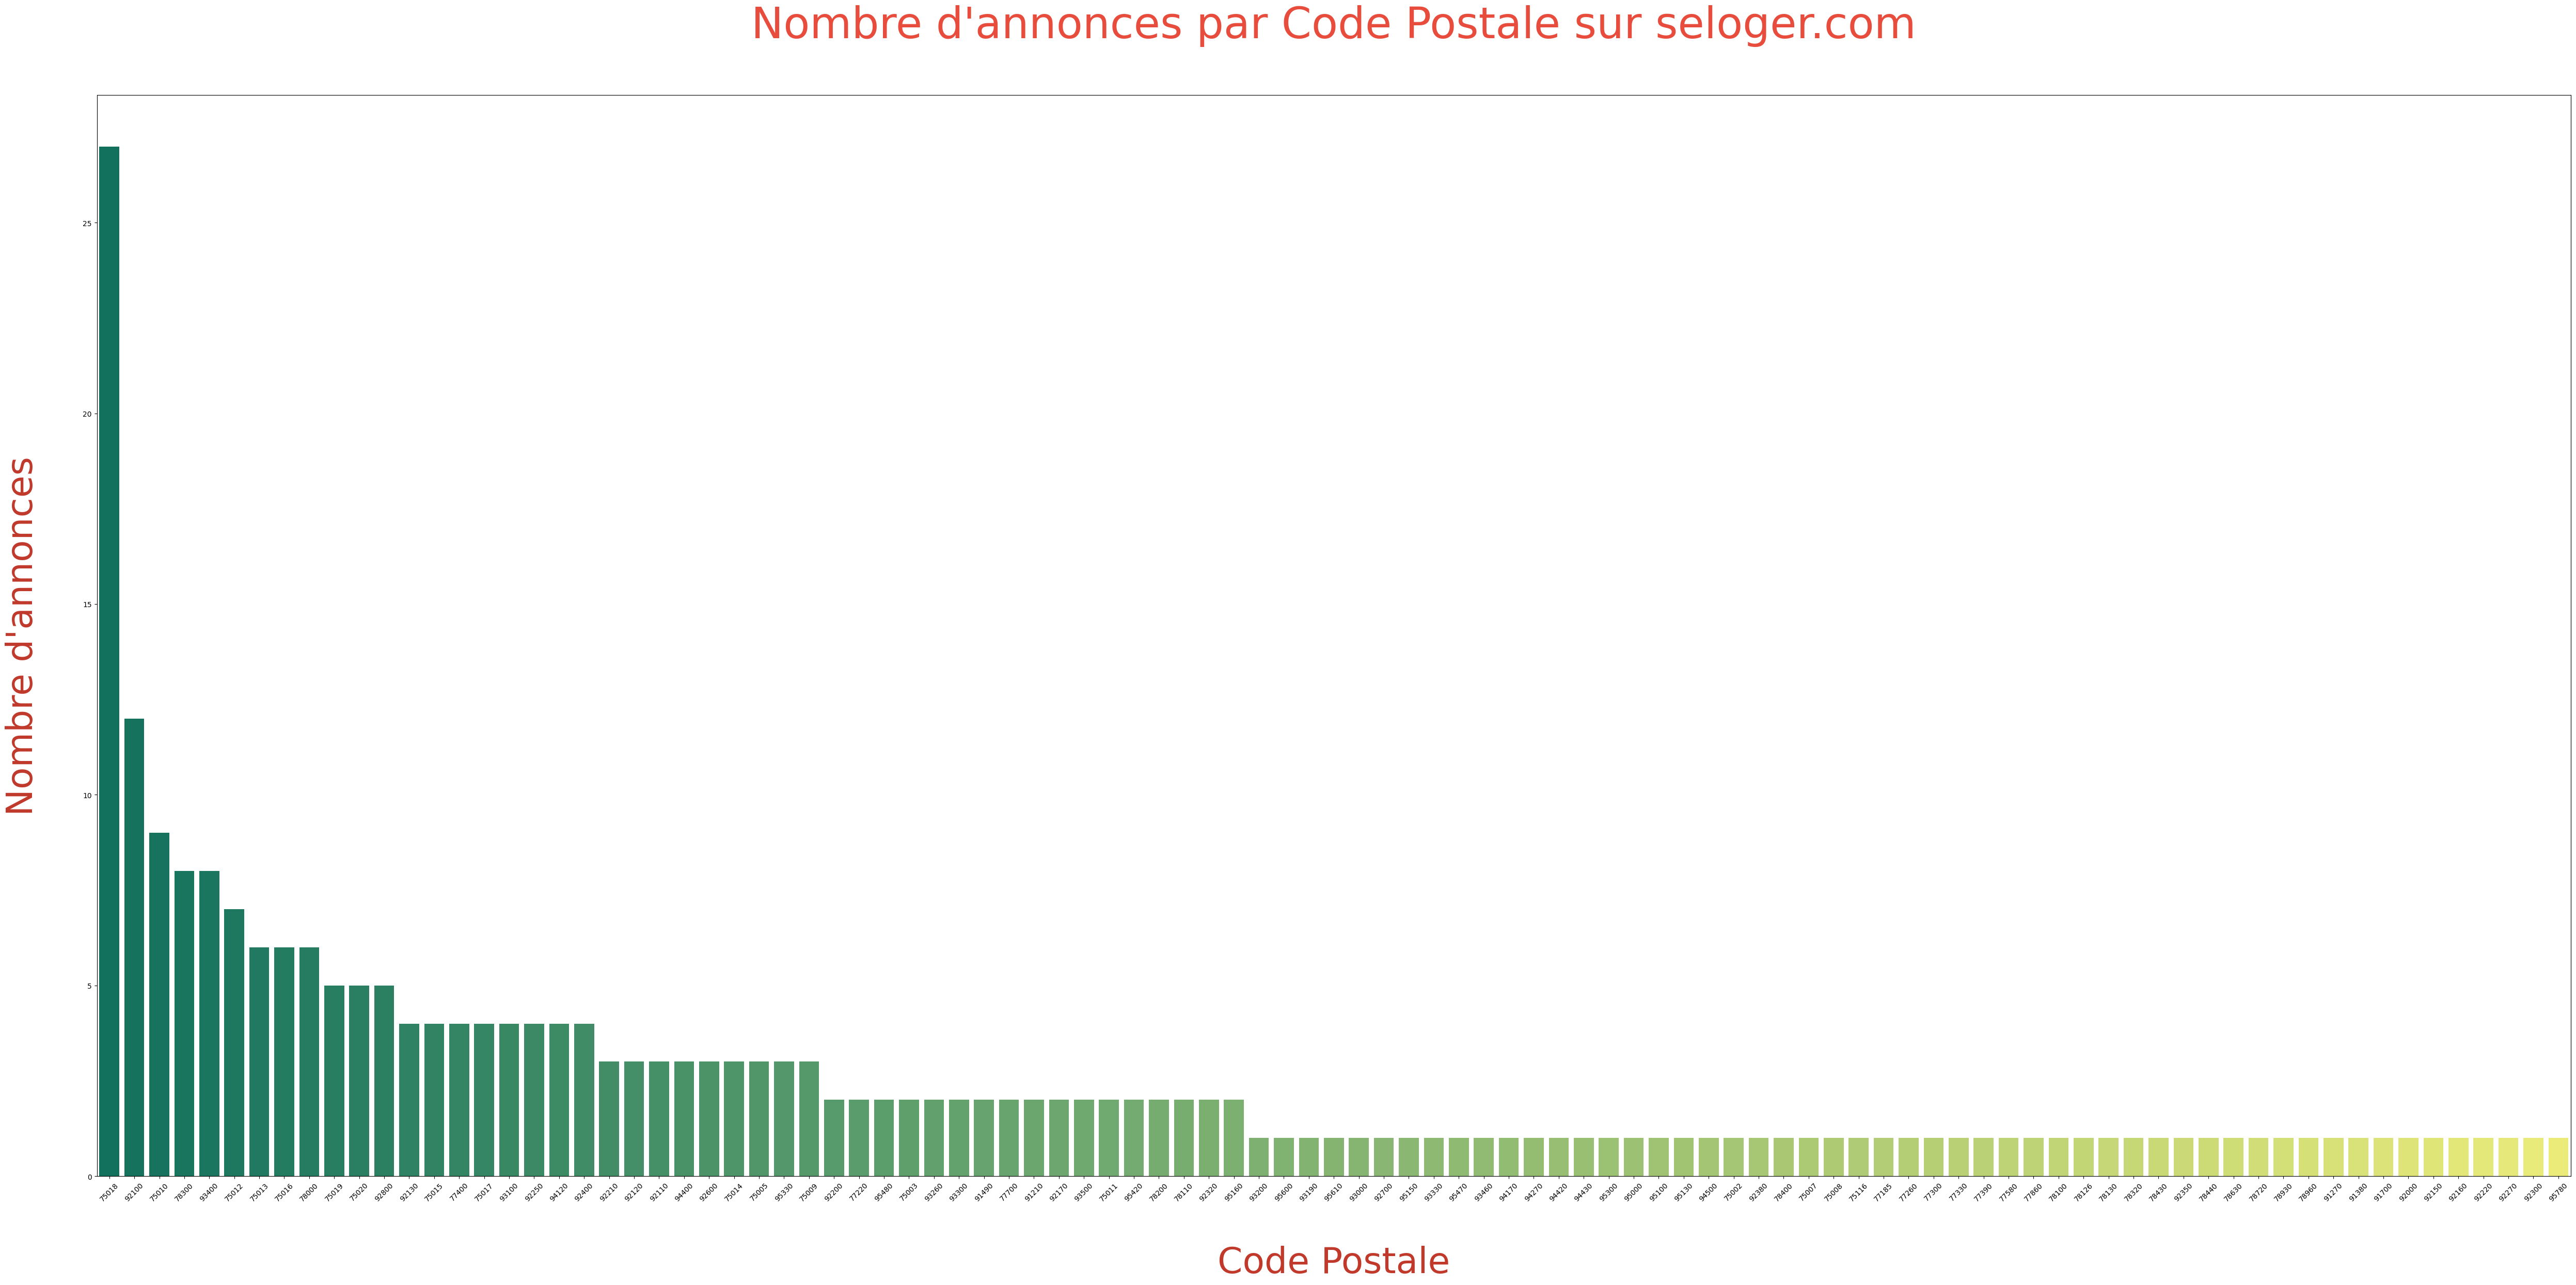

In [352]:
plt.figure(figsize=(50,25))
sns.barplot(x=nb_annonce['code_postal'], y=nb_annonce['Nb_annonces'], palette="summer")
plt.xlabel('\nCode Postale', fontsize=50, color='#c0392b')
plt.ylabel("Nombre d'annonces\n", fontsize=50, color='#c0392b')
plt.title("Nombre d'annonces par Code Postale sur seloger.com\n", fontsize=60, color='#e74c3c')
plt.xticks(rotation= 45)
plt.tight_layout()

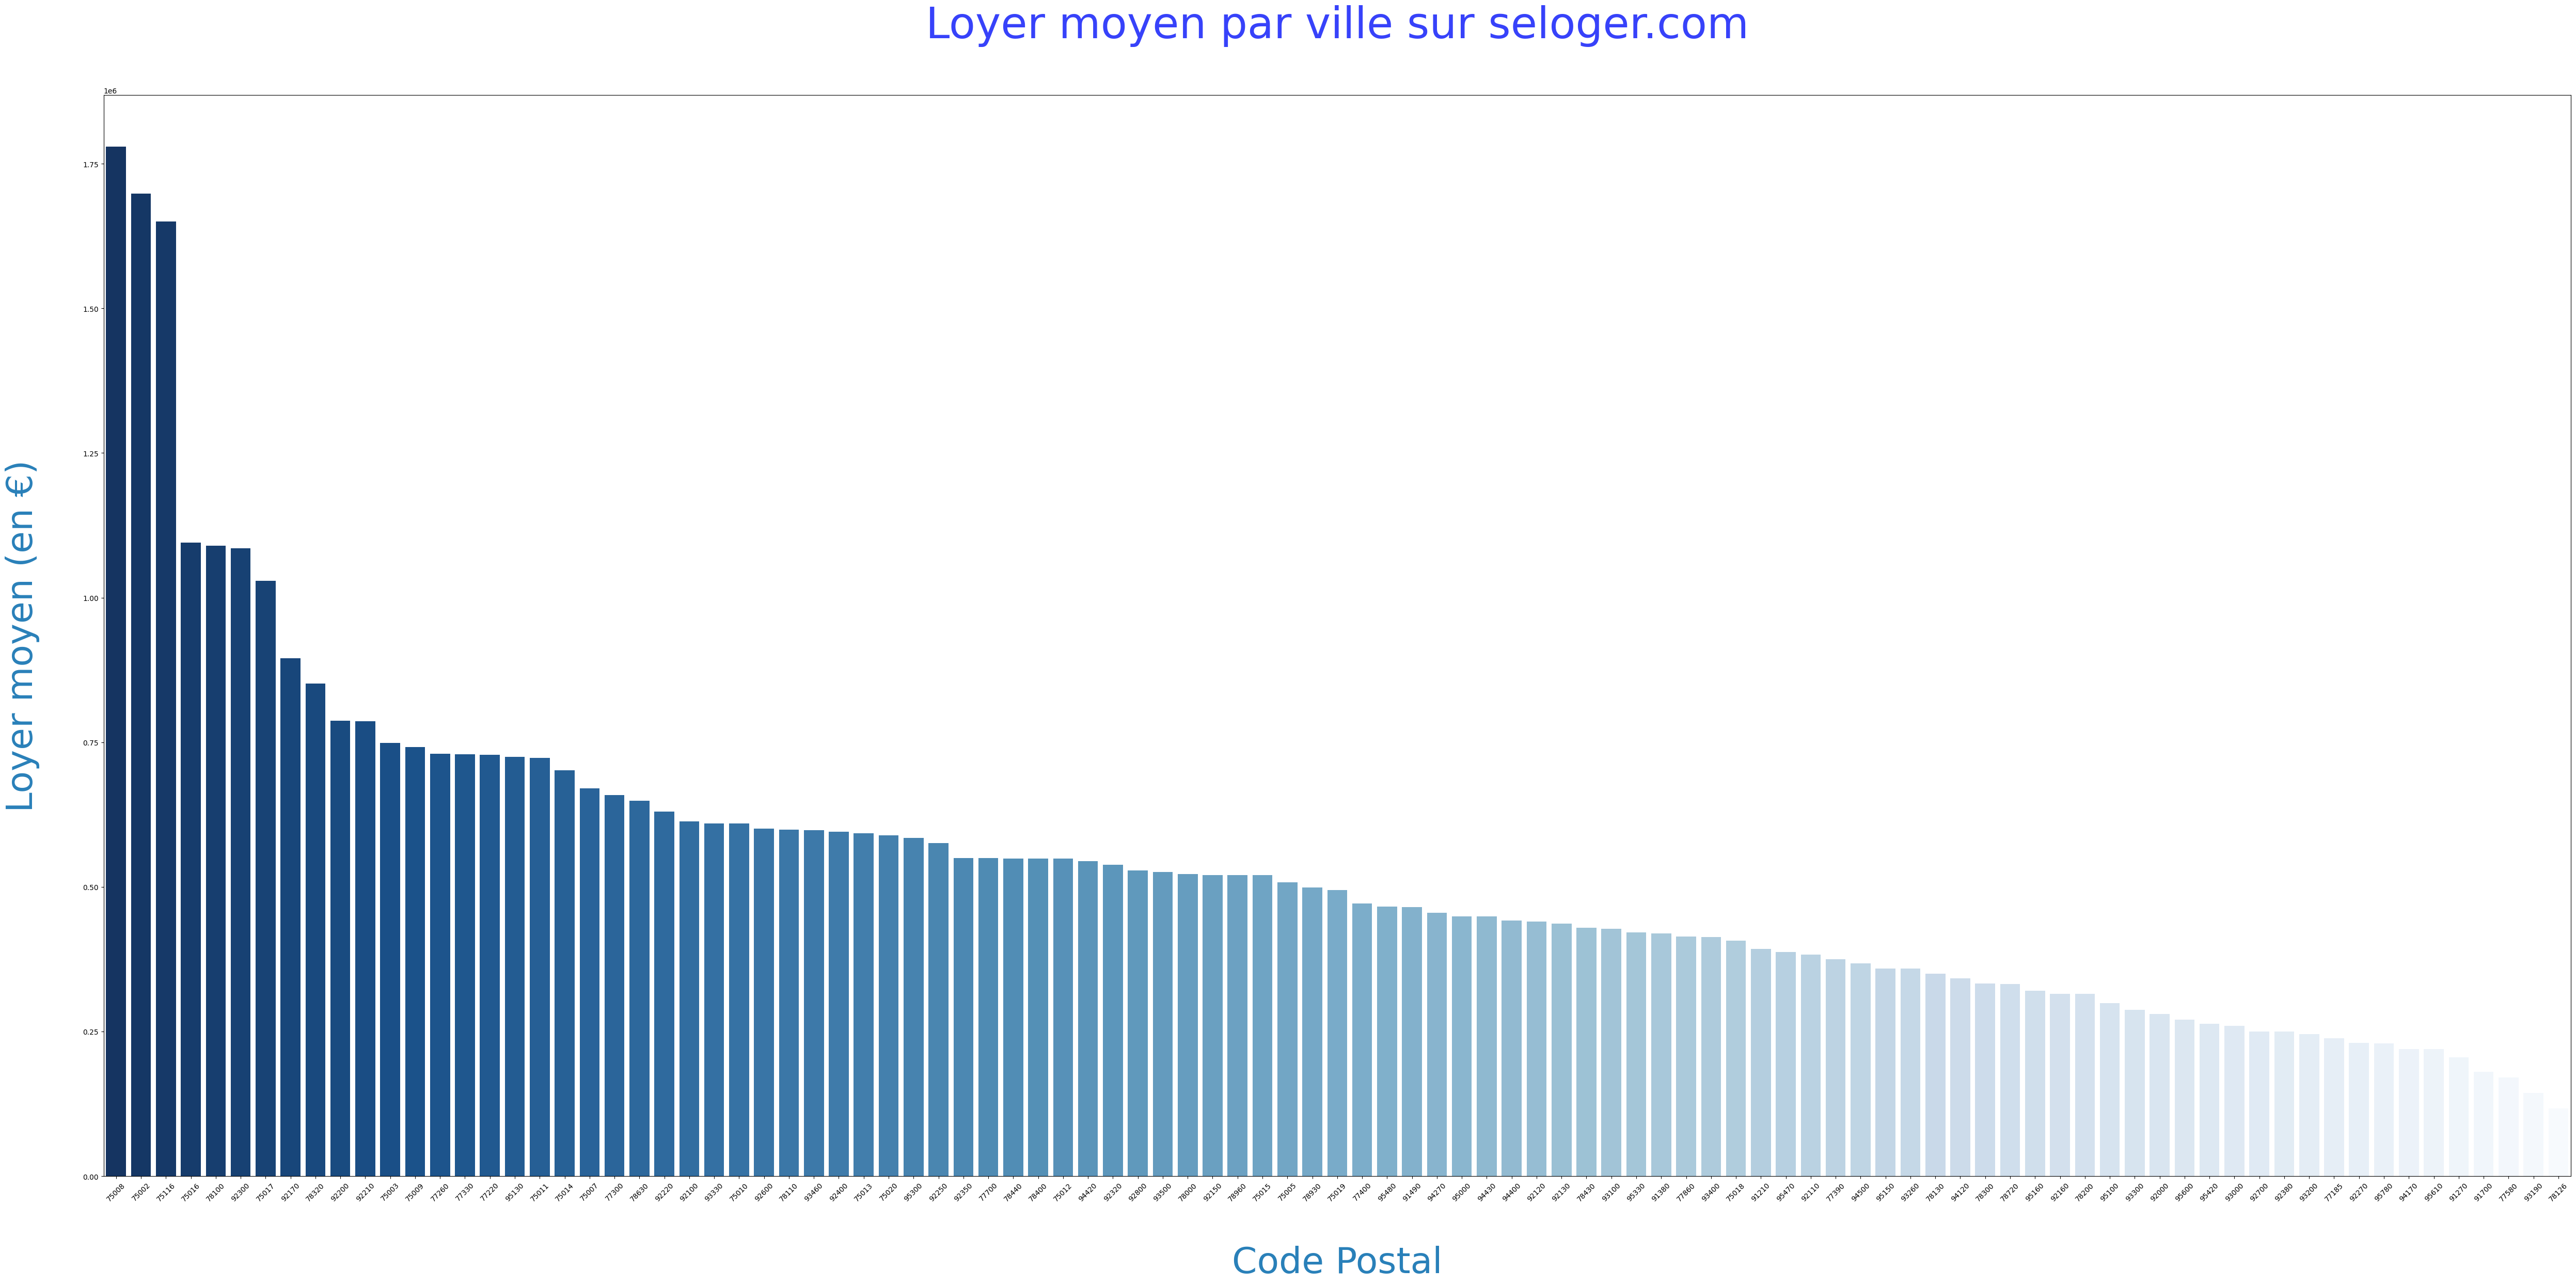

In [353]:
prix = results[['price (€)','code_postal']].groupby('code_postal').mean().round().sort_values(by='price (€)', ascending=False)
prix.reset_index(0, inplace=True)
prix.head()


plt.figure(figsize=(50,25))
sns.barplot(x=prix['code_postal'], y=prix['price (€)'], palette="Blues_r")
plt.xlabel('\nCode Postal', fontsize=50, color='#2980b9')
plt.ylabel('Loyer moyen (en €)\n', fontsize=50, color='#2980b9')
plt.title("Loyer moyen par ville sur seloger.com\n", fontsize=60, color='#3742fa')
plt.xticks(rotation= 45)
plt.tight_layout()

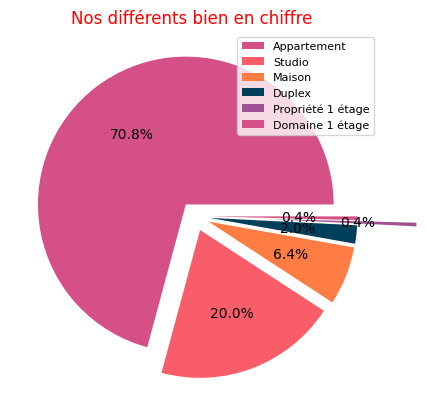

In [361]:
# Visualisation global de nos biens 
label = dfb.unique()
explode = (0.1, 0.1,0.1, 0.1, 0.5, 0.1)
popuratity = dfb.value_counts()
colors = ["#d45087", "#f95d6a","#ff7c43","#003f5c", "#a05195"]
plt.pie(popuratity, explode=explode, colors=colors,autopct='%1.1f%%')
plt.title("Nos différents bien en chiffre ",color="red")
plt.legend(loc='upper right', labels=label,frameon=True,fontsize=8)

In [319]:
## Catégoriser nos valeurs en fonction d'ensemble
def discretize(price,limits):
    limits = sorted(limits)
    for s,e in zip(limits[:-1], limits[1:]):
        if s <= price < e:
            return f'{s}--{e}'.replace("inf", "\u221E")
    return "Unknown"

In [362]:
# Définition des limites et application de la fonction
limits = [0,1000,2000,3000,4000,5000,8000,np.inf]
df_clean["price_categorie_m2"] = df_clean["price_m2"].apply(discretize,args=(limits,))

Text(0.5, 1.0, 'Répartition des catégories de prix au m2')

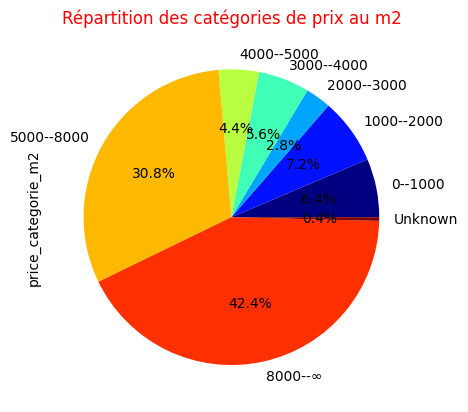

In [363]:
df_clean["price_categorie_m2"].value_counts().sort_index().plot.pie(autopct='%1.1f%%', cmap="jet")
plt.title("Répartition des catégories de prix au m2",color="red")

In [364]:
# Nombre de biens présent dans chaques catégorie
df_clean["price_categorie_m2"].value_counts()

8000--∞       106
5000--8000     77
1000--2000     18
0--1000        16
3000--4000     14
4000--5000     11
2000--3000      7
Unknown         1
Name: price_categorie_m2, dtype: int64

In [365]:
# Préparation des données pour la HeatMap
df_hm = df_clean.pivot_table(index="code_postal",columns="type",aggfunc="size",fill_value=0)

In [366]:
# Résumé de nombre et du type de bien par ville
df_hm

type,Appartement,Domaine 1 étage,Duplex,Maison,Propriété 1 étage,Studio
code_postal,,,,,,
75002,1,0,0,0,0,0
75003,1,0,0,0,0,1
75005,3,0,0,0,0,0
75007,1,0,0,0,0,0
75008,1,0,0,0,0,0
...,...,...,...,...,...,...
95470,0,0,0,1,0,0
95480,0,0,0,2,0,0
95600,1,0,0,0,0,0


<Axes: xlabel='type', ylabel='code_postal'>

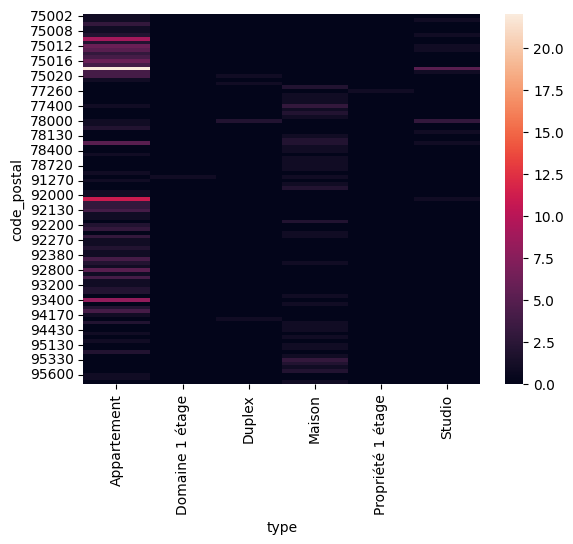

In [370]:
# Heatmap en fonction du code postal de chaque ville
sns.heatmap(df_hm)